This code uses $\texttt{Polytope}$ package from here:  https://tulip-control.github.io/polytope/ 


In [1]:
# !pip install polytope

import polytope as pt
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

## **Polytope definition and plot**

Single polytope 
  [[ 1.  0.] |    [[10.]
   [ 0.  1.] x <=  [10.]
   [ 0. -1.] |     [10.]
   [-1.  0.]]|     [10.]]



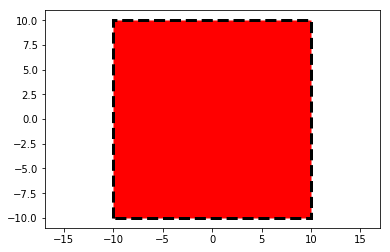

In [2]:
%matplotlib inline
# H Representation
A = np.array([[1, 0],
              [0, 1],
              [0, -1],
              [-1, 0]])

b = np.array([[10],
              [10],
              [10],
              [10]])


P = pt.Polytope(A, b)
print(P)
fig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [20, 20]
P.plot(ax, color='r')
ax.autoscale_view()
ax.axis('equal')
plt.show()


## **Polytope reduction**

Single polytope 
  [[ 1.       0.     ] |    [[10.     ]
   [ 0.       1.     ] |     [10.     ]
   [ 0.      -1.     ] x <=  [10.     ]
   [-1.       0.     ] |     [10.     ]
   [ 0.70711  0.70711]]|     [ 3.53553]]

-------reduced polytope----
Single polytope 
  [[ 1.       0.     ] |    [[10.     ]
   [ 0.       1.     ] |     [10.     ]
   [ 0.      -1.     ] x <=  [10.     ]
   [-1.       0.     ] |     [10.     ]
   [ 0.70711  0.70711]]|     [ 3.53553]]



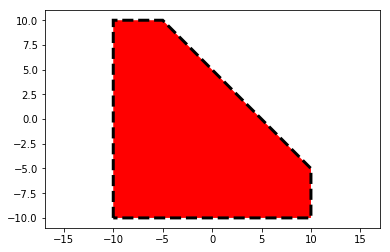

In [3]:
%matplotlib inline

A = np.array([[1, 0],
              [0, 1],
              [0, -1],
              [-1, 0],
              [1,1]])

b = np.array([[10],
              [10],
              [10],
              [10],
              [5]])

P = pt.Polytope(A, b)
print(P)
P=pt.reduce(P)
print('-------reduced polytope----')
print(P)
P = pt.Polytope(A, b)
fig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [20, 20]
P.plot(ax, color='r')
ax.autoscale_view()
ax.axis('equal')
plt.show()

## **Toolbox handles Polytope not Polyhedra**

In [4]:
%matplotlib inline

A = np.array([[1, 0],
              [0, 1],
              [0, -1]])

b = np.array([[10],
              [10],
              [10]])


P = pt.Polytope(A, b)
fig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [20, 20]
P.plot(ax, color='r')
ax.autoscale_view()
ax.axis('equal')
plt.show()

Exception: extreme: polytope is unbounded

## **Polytope V-representation and conversion H to V, V to H**


Single polytope 
  [[-0.       1.     ] |    [[10.     ]
   [ 0.94868 -0.31623] x <=  [ 6.32456]
   [-1.       0.     ] |     [10.     ]
   [ 0.31623 -0.94868]]|     [ 6.32456]]



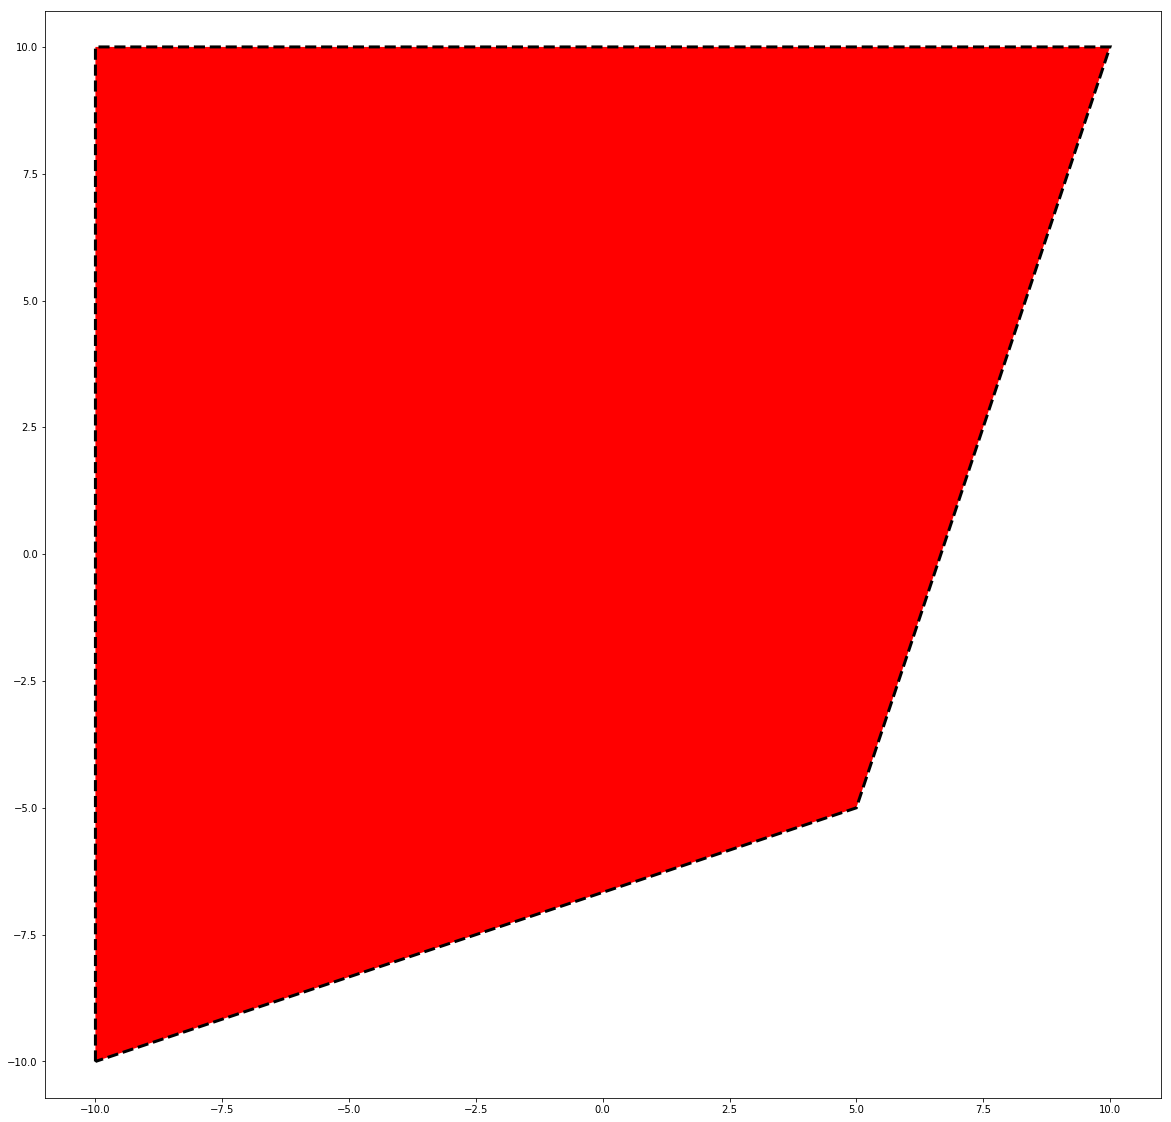

[[-10. -10.]
 [-10.  10.]
 [  5.  -5.]
 [ 10.  10.]]


In [9]:
V=[[10,10],[-10,10],[5,-5],[-10,-10]]
P=pt.qhull(np.asarray(V))
print(P)

fig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [4, 4]
P.plot(ax, color='r')
ax.axis('equal')
plt.show()

V1 = pt.extreme(P)
print(V1)

## **Minkwosky sum of two Polytopes** 

(-8.8, 8.8, -8.8, 8.8)

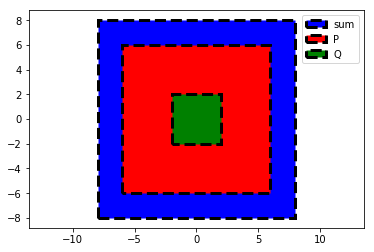

In [7]:
# Figure 4.11 MPC book 
%matplotlib inline

def minkowski_sum(X, Y):

    # Minkowski sum between two polytopes based on 
    # vertex enumeration. So, it's not fast for the
    # high dimensional polytopes with lots of vertices.
    V_sum = []
    if isinstance(X, pt.Polytope):
        V1 = pt.extreme(X)
    else:
        V1 = X
        
    if isinstance(Y, pt.Polytope):
        V2 = pt.extreme(Y)
    else:
        V2 = Y

    for i in range(V1.shape[0]):
        for j in range(V2.shape[0]):
            V_sum.append(V1[i,:] + V2[j,:])
                    
    return pt.qhull(np.asarray(V_sum))

   

P = np.array([[1, 0],
              [0, 1],
              [0, -1],
              [-1, 0]])

p = np.array([[6],
              [6],
              [6],
              [6]])

Q = np.array([[1, 0],
              [0, 1],
              [0, -1],
              [-1, 0]])

q = np.array([[2],
              [2],
              [2],
              [2]])

Pp = pt.Polytope(P, p)
Qq = pt.Polytope(Q, q)

p_sum  = minkowski_sum(Pp, Qq)

fig, ax = plt.subplots(1,1)
p_sum.plot(ax, color='b')
Pp.plot(ax, color='r')
Qq.plot(ax, color='g')
ax.legend(['sum', 'P', 'Q'])
ax.autoscale_view()
ax.axis('equal')

## **Polytope Projection** 

Single polytope 
  [[ 1. -0.] |    [[6.]
   [-0.  1.] x <=  [3.]
   [-0. -1.] |     [3.]
   [-1.  0.]]|     [6.]]



(-6.600000000000001, 6.6, -3.3000000000000007, 3.3)

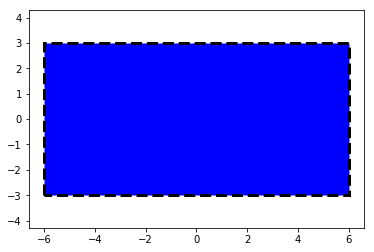

In [8]:
%matplotlib inline

def projection(X, nx):
    V_sum = []
    V = pt.extreme(X)
    for i in range(V.shape[0]):
          V_sum.append(V[i,0:nx])
    return pt.qhull(np.asarray(V_sum))
   

P = np.array([[1, 0, 0],
              [0, 1, 0 ],
              [0, -1, 0 ],
              [-1, 0, 0],
              [0,0,1],
              [0,0,-1]])

p = np.array([[6],
              [3],
              [3],
              [6],
              [10],
              [10]])

Pp = pt.Polytope(P, p)

PProj  = projection(Pp,2 )
print(PProj)

fig, ax = plt.subplots(1,1)
PProj.plot(ax, color='b')
ax.autoscale_view()
ax.axis('equal')

## **N-Steps Controlable sets to a given Set** ##

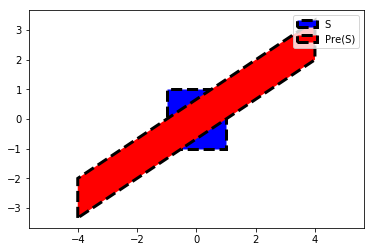

In [9]:
# The operation Pre(S) results in the set of states which evolve into the target set S in one time step. 
def precursor(Sset, A, Uset=pt.Polytope(), B=np.array([])):
        if not B.any():
            return pt.Polytope(Sset.A @ A, Sset.b)
        else:
            tmp  = minkowski_sum( Sset, pt.extreme(Uset) @ -B.T )
        return pt.Polytope(tmp.A @ A, tmp.b)


# Example one step 
A = np.array([[1.5, 0],
              [1.0, -1.5]])

B = np.array([[1.0], 
              [0.0]])

S = pt.Polytope(np.array([[1.0, 0], 
                          [0, 1.0],
                          [-1, 0],
                          [0, -1]]), 
                np.array([[1], 
                          [1],
                          [1],
                          [1]]))

U = pt.Polytope(np.array([[1.0], 
                          [-1.0]]),
                np.array([[5.0], 
                          [5.0]]))

preS = precursor(S, A, U, B)
fig, ax = plt.subplots()
S.plot(ax, color='b')
#preS.intersect(S).plot(ax, color='r')
preS.plot(ax, color='r')
ax.legend(['S', 'Pre(S)'])
plt.rcParams['figure.figsize'] = [10, 10]
ax.autoscale_view()
ax.axis('equal')
plt.show()




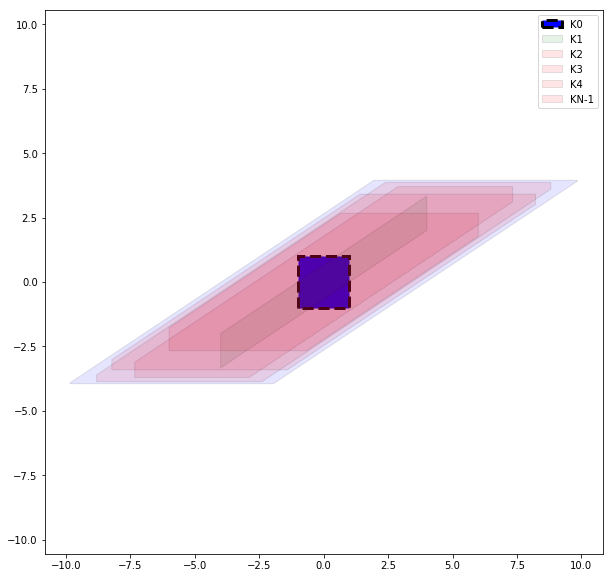

In [13]:
# Example 10 steps 


N = 10  # number of steps
K = {}
PreS = precursor(S, A, U, B) #one step controllable to S
for j in range(N):
    K[j]= PreS #for j=0 one ste controllable
    PreS = precursor(K[j], A, U, B)


# Plotting 
plt.clf()
plt.cla()
plt.close('all')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
S.plot(ax, color='b')
K[0].plot(ax, color='g', alpha=0.1, linestyle='solid', linewidth=1, edgecolor=None)      # K_0 is equivalent to Pre S
K[1].plot(ax, color='r', alpha=0.1, linestyle='solid', linewidth=1)                      # K_1 two step controllable set 
K[2].plot(ax, color='r', alpha=0.1, linestyle='solid', linewidth=1)                      # K_2 three step controllable set 
K[3].plot(ax, color='r', alpha=0.1, linestyle='solid', linewidth=1)                      # K_3 
K[4].plot(ax, color='r', alpha=0.1, linestyle='solid', linewidth=1)                      # K_4 
K[N-1].plot(ax, color='b', alpha=0.1, linestyle='solid', linewidth=1)                      # K_5  
ax.legend(['K0', 'K1', 'K2', 'K3', 'K4', 'KN-1'])

plt.rcParams['figure.figsize'] = [10, 10]
ax.autoscale_view()
ax.axis('equal')
plt.show()



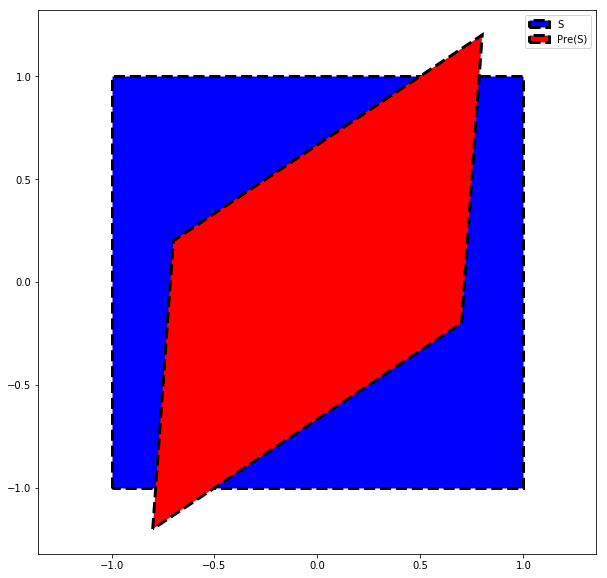

In [14]:
# Case of autonomus systems
# u=[-0.1, -0.1]*x
K=np.array([[-0.1, -0.1]])
Acl=A+B@K # x+=Ax+Bu but u=K*x-? x+=(A+BK)x
S = pt.Polytope(np.array([[1.0, 0], 
                          [0, 1.0],
                          [-1, 0],
                          [0, -1]]), 
                np.array([[1], 
                          [1],
                          [1],
                          [1]]))

# Input Constraints Hu*u<=Ku (umin=-5, umax=5)
Hu=np.array([[1.0],[-1.0]])
ku=np.array([[5.0], [5.0]])
# recall U = pt.Polytope(Hu,ku)

# if u has to be in U then Kx has to be in U -> (Hu*K)*x<=ku
# U now become X constraints
X = pt.Polytope(Hu@K,ku)
Snew=S.intersect(X)
preS = precursor(Snew, Acl)

fig, ax = plt.subplots()
Snew.plot(ax, color='b')
#preS.intersect(S).plot(ax, color='r')
preS.plot(ax, color='r')
ax.legend(['S', 'Pre(S)'])
plt.rcParams['figure.figsize'] = [5, 5]
ax.autoscale_view()
ax.axis('equal')
plt.show()


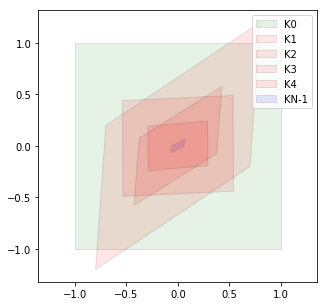

[ 1.3651 -1.4651]


In [15]:
# Example 10 steps 


N = 10  # number of steps
K = {}
PreS = Snew
for j in range(N):
    K[j]= PreS.intersect(X)
    PreS = precursor(K[j], Acl)


# Plotting 
plt.clf()
plt.cla()
plt.close('all')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
K[0].plot(ax, color='g', alpha=0.1, linestyle='solid', linewidth=1, edgecolor=None)      # K_0 is equivalent to Pre S
K[1].plot(ax, color='r', alpha=0.1, linestyle='solid', linewidth=1)                      # K_1 two step controllable set 
K[2].plot(ax, color='r', alpha=0.1, linestyle='solid', linewidth=1)                      # K_2 three step controllable set 
K[3].plot(ax, color='r', alpha=0.1, linestyle='solid', linewidth=1)                      # K_3 
K[4].plot(ax, color='r', alpha=0.1, linestyle='solid', linewidth=1)                      # K_4 
K[N-1].plot(ax, color='b', alpha=0.1, linestyle='solid', linewidth=1)                      # K_5  
ax.legend(['K0', 'K1', 'K2', 'K3', 'K4', 'KN-1'])

plt.rcParams['figure.figsize'] = [20, 20]
ax.autoscale_view()
ax.axis('equal')
plt.show()

import numpy.linalg as nplin
print(nplin.eigvals(Acl))

## **Control Invariant and Invariant Example**

In [11]:
def max_pos_inv(A, S):
    '''
    return: Oinf means that if x(t+1) = Ax(t) system, initial point in Oinf,
    it will always stay in Xset 
    Xset: the region got from state constraints 
    A: A matrix of system 
    Note: the state should always be in Xset, so Omegap should always intersect with Xset.
    '''
    maxIterations = 500
    # initialization
    Omega_i = S 
    for i in range(maxIterations):
        # compute backward reachable set
        P = precursor(Omega_i, A)
        # intersect with the state constraints
        P = pt.reduce(P).intersect(Omega_i)
        if P == Omega_i:
            Oinf = Omega_i
            break
        else:
            Omega_i = P
    if i == maxIterations:
        converged = 0
    else:
        converged = 1
    return Oinf, converged

def max_cntr_inv(A,B,X,U):
    '''
    same for the max_pos_inv doc, the only difference between them is B, 
    B was used as input param in precursor 
    '''
    maxIterations = 500
    # initialization
    Omega0 = X 
    for i in range(maxIterations):
        # compute backward reachable set
        P = precursor(Omega0, A, U, B)
        # intersect with the state constraints
        P = pt.reduce(P).intersect(Omega0)
        if P == Omega0:
            Cinf = Omega0
            break
        else:
            Omega0 = P
    if i == maxIterations:
        converged = 0
    else:
        converged = 1
    return Cinf, converged



# Maximal & Control positive invariant set
## Example 1: $\mathcal{O}_{\infty}$

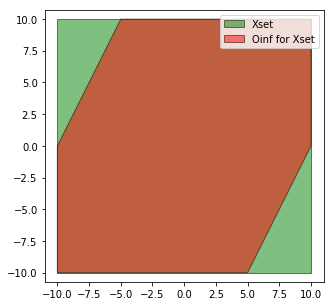

In [21]:
# Example 10.5 (Figure 10.7) MPC book

A = np.array([[0.5, 0],
              [1.0, -0.5]])

X = pt.Polytope(np.array([[1.0, 0], 
                          [0, 1.0],
                          [-1, 0],
                          [0, -1]]), 
                np.array([[10.0], 
                          [10.0],
                          [10.0],
                          [10.0]]))

Oinf, converged = max_pos_inv(A,X)

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [5,5]
X.plot(ax, color='g', alpha=0.5, linestyle='solid', linewidth=1)
Oinf.plot(ax, color='r', alpha=0.5, linestyle='solid', linewidth=1, edgecolor=None)
plt.legend(['Xset','Oinf for Xset'])
ax.autoscale_view()
ax.axis('equal')
plt.show()

## Example 2: $\mathcal{C}_{\infty}$

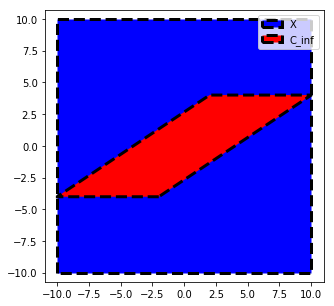

In [22]:
# Example 10.6 (Figure 10.8) MPC book

A = np.array([[1.5, 0],
              [1.0, -1.5]])

B = np.array([[1.0], 
              [0.0]])
X = pt.Polytope(np.array([[1.0, 0], 
                          [0, 1.0],
                          [-1, 0],
                          [0, -1]]), 
                np.array([[10.0], 
                          [10.0],
                          [10.0],
                          [10.0]]))

U = pt.Polytope(np.array([[1.0], 
                          [-1.0]]),
                np.array([[5.0], 
                          [5.0]]))

Cinfset, converged = max_cntr_inv(A, B, X, U)
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [5,5]
X.plot(ax, color='b')
Cinfset.plot(ax, color='r')
ax.legend(['X', 'C_inf'])
ax.autoscale_view()
ax.axis('equal')
plt.show()

# Cruise Control Example

# Wall assumption study (target car v=0 instantaneously) 

Model: 
xdot=v;
vdot=-b/m*v +1/m* ainput

In [25]:
b=50 #[N *inv(v)]  
m=6000 #[kg]

Ac = np.array([[0, 1],
              [0, -b/m]])

Bc = np.array([[0], 
              [1]])

dt=0.01 
eye2=np.array([[1, 0],
              [0, 1]])

#Euler discretization
Ad=eye2+Ac*dt
Bd=Bc*dt


X = pt.Polytope(np.array([[1.0, 0], 
                          [0, 1.0],
                          [-1, 0],
                          [0, -1]]), 
                np.array([[10.0], 
                          [26.0],
                          [0.0],
                          [0.0]]))

U = pt.Polytope(np.array([[1.0], 
                          [-1.0]]),
                np.array([[3.0], 
                          [3.0]]))



Cinfset, converged = max_cntr_inv(Ad, Bd, X, U)
# control invarient set: 
# certain controller -> set your target set but havn't define a controller  


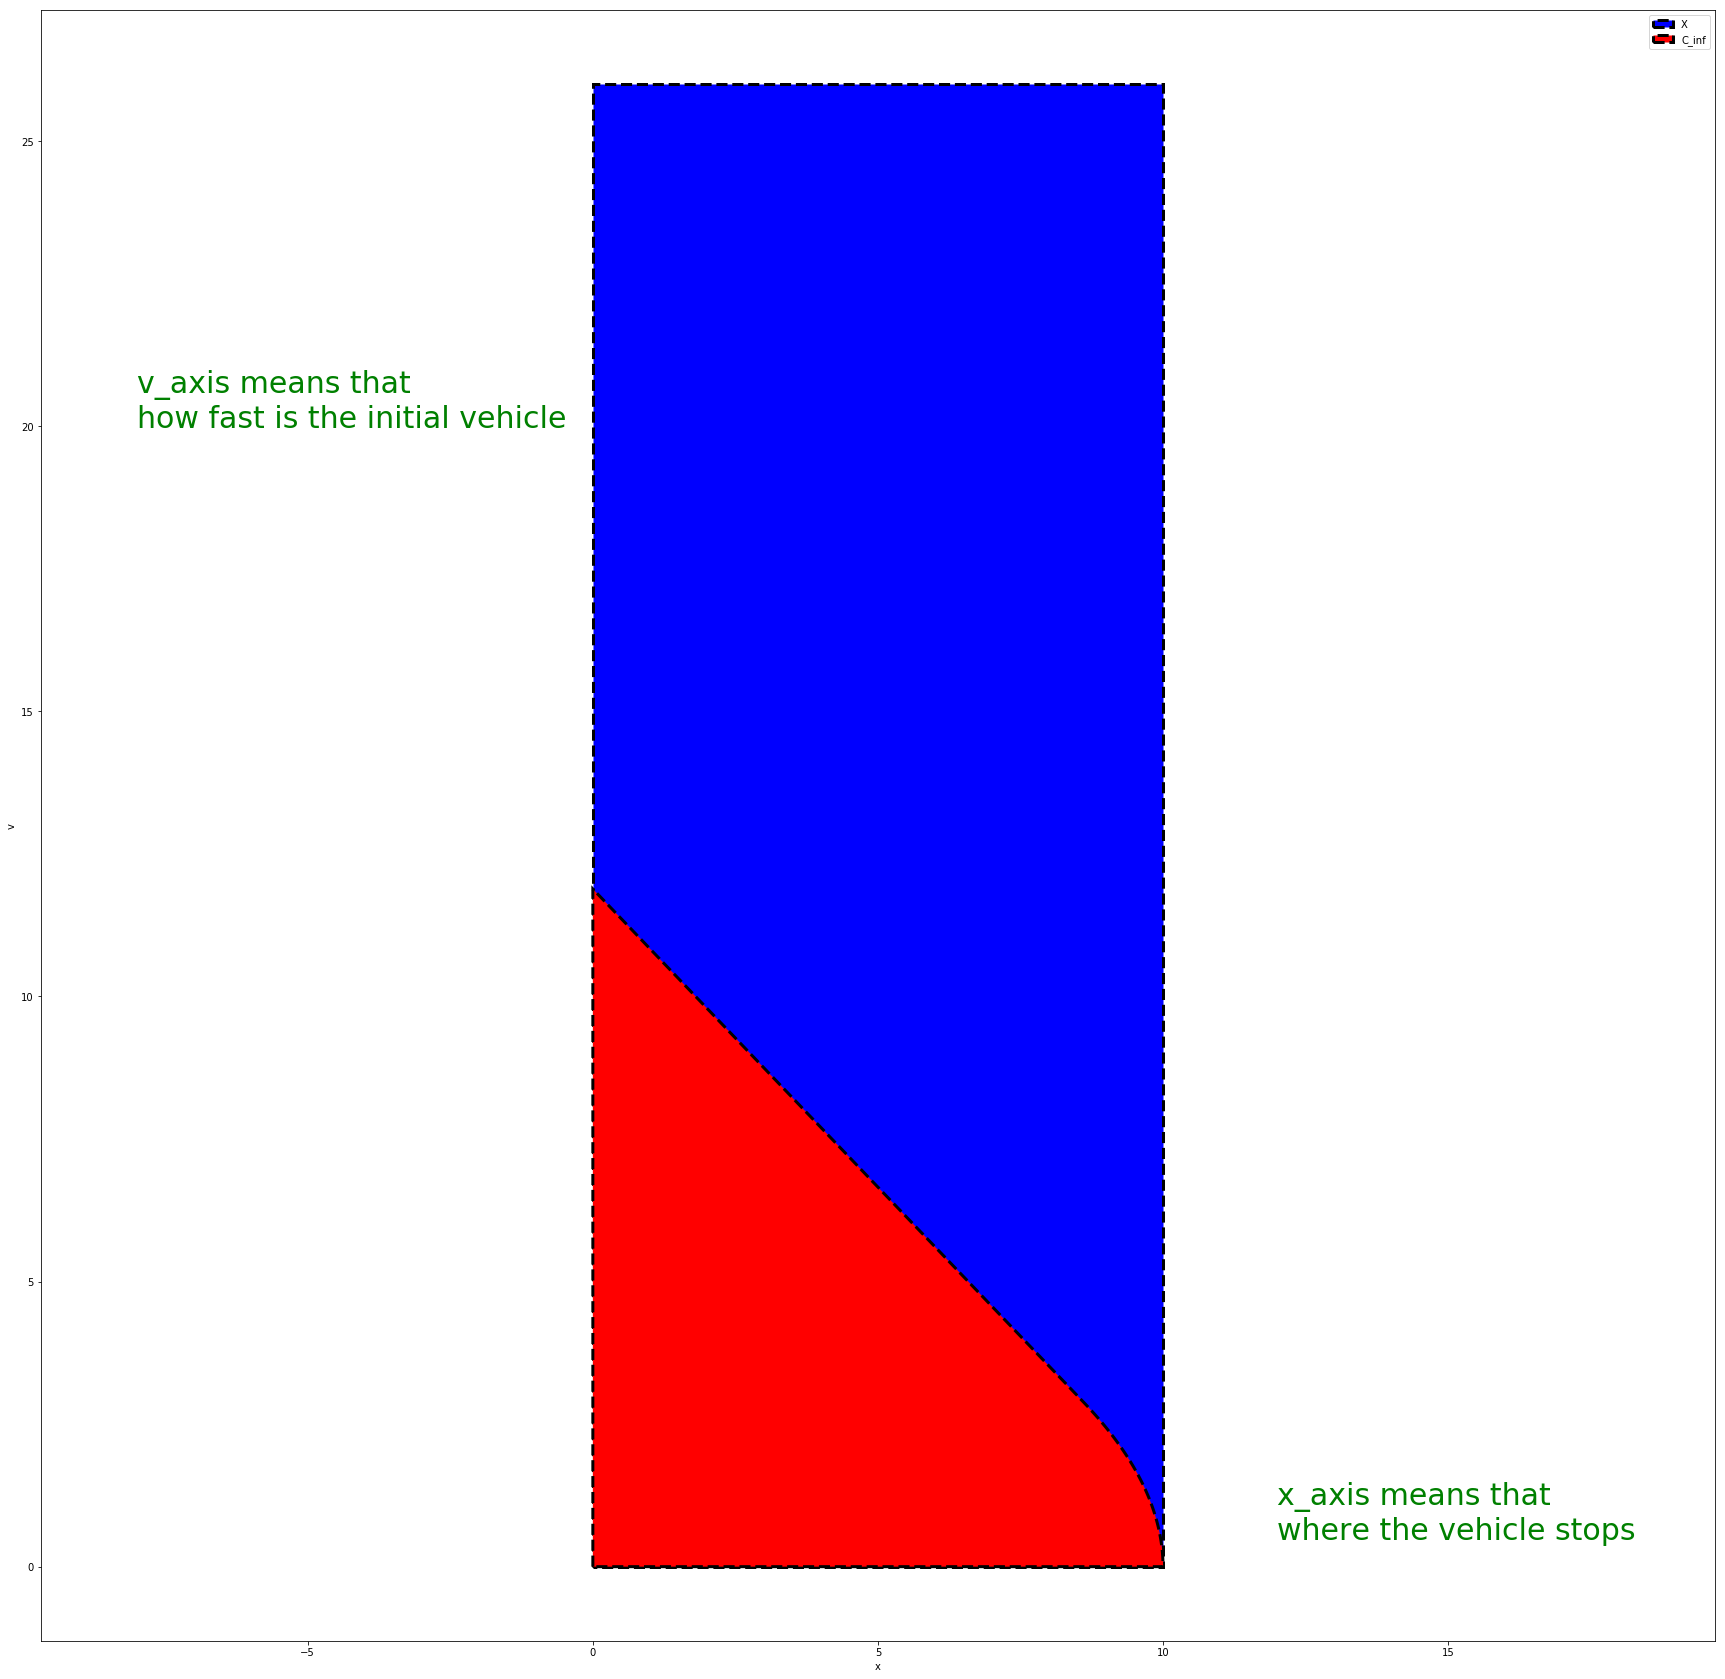

In [35]:
fig, ax = plt.subplots()
X.plot(ax, color='b')
Cinfset.plot(ax, color='r')
ax.legend(['X', 'C_inf'])
plt.rcParams['figure.figsize'] = [30, 30]
ax.autoscale_view()
ax.axis('equal')
ax.set_xlabel('x')
ax.set_ylabel('v')
plt.text(12,0.5,'x_axis means that\nwhere the vehicle stops',size = 30, color='g')
plt.text(-8,20,'v_axis means that\nhow fast is the initial vehicle',size = 30, color='g')
plt.show()


In [57]:
# Controlled case
# Case of autonomus systems
#u=-0.1*v  * proportional controller u=K*v
K=np.array([[0, -2]])

################################
# carefull usally eng. used gains+saturation
# braking controller:
# u=k*x if u>=umin otherwise u=min (this is how you satisfy input constraints)
# this is a switched control and we have not stuedied Oinf and Cinf for switched
#controller -> hard problem, hybrid systems, not covered in this class.
#################
#####################
# Note u=-3 # slam on brake controller will give you Oinf =Cinf
# need to study controllers fo the type u=k*x+c
# You can easily modify this code to address constant controller.
#######################


# For which set does this controller avoid collision??

Acl=Ad+Bd@K # x+=Ax+Bu but u=K*x-> x+=(A+BK)x

# Input Constraints Hu*u<=Ku (umin=-3, umax=3)
Hu=np.array([[1.0],[-1.0]])
ku=np.array([[3.0], [3.0]])
# recall U = pt.Polytope(Hu,ku)

# Please learn why and how (see next) input constraints need to be 
#transformed into state constraints when closed loop system is studies

# if u has to be in U then Kx has to be in U -> (Hu*K)*x<=ku
# U now become X constraints
Xu = pt.Polytope(Hu@K,ku)
Xnew=X.intersect(Xu)

Oinf, converged = max_pos_inv(Acl,Xnew)



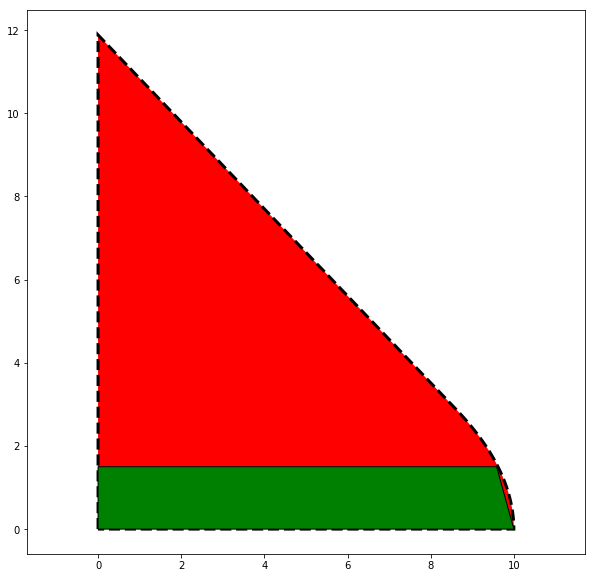

In [58]:
fig, ax = plt.subplots()
Cinfset.plot(ax, color='r')
Oinf.plot(ax, color='g',  linestyle='solid', linewidth=1, edgecolor=None)
plt.rcParams['figure.figsize'] = [10,10]
ax.autoscale_view()
ax.axis('equal')
plt.show()
